In [1]:
from qiskit import *
import networkx as nx
from edge_coloring import EdgeColoring
from dfs import DFS
from heuristic import Heuristic

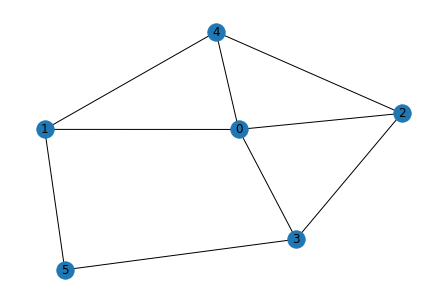

In [2]:
G = nx.erdos_renyi_graph(6,0.6,seed=10)
nx.draw(G,with_labels=True)

Without any optimization

In [3]:
obj = EdgeColoring(G,0.57)
qc = obj.ec_ansatz(optimize=False,undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())
print("Number of CNOT gates: ",qc.count_ops()['cx'])

        ┌───┐                                                                                                                                     ░ ┌─┐               
   q_0: ┤ H ├──■────────────────────────────■─────────■────────────────■────■─────────────────────────────────■──────────────■────────────────■───░─┤M├───────────────
        ├───┤  │                            │       ┌─┴─┐┌──────────┐┌─┴─┐  │                                 │              │                │   ░ └╥┘┌─┐            
   q_1: ┤ H ├──┼───────■────────────────────┼────■──┤ X ├┤ Rz(0.57) ├┤ X ├──┼────■────────────────────────────┼────■─────────┼────────────────┼───░──╫─┤M├────────────
        ├───┤┌─┴─┐     │      ┌──────────┐┌─┴─┐  │  └───┘└──────────┘└───┘  │    │                            │    │         │                │   ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ X ├─────┼──────┤ Rz(0.57) ├┤ X ├──┼────■────────────────■────┼────┼───────■────────────────────┼────┼────■────┼────────────────┼───░──╫──╫─┤M├────────

Edge Coloring Optimization

In [4]:
obj = EdgeColoring(G,0.57)
qc = obj.ec_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())
print("Number of CNOT gates: ",qc.count_ops()['cx'])

        ┌───┐                                                                                                                    ░ ┌─┐               
   q_0: ┤ H ├──────────────■─────────■────────────────■────■─────────────────────────────────■──────────────■────────────────■───░─┤M├───────────────
        ├───┤              │       ┌─┴─┐┌──────────┐┌─┴─┐  │                                 │              │                │   ░ └╥┘┌─┐            
   q_1: ┤ H ├──────────────┼────■──┤ X ├┤ Rz(0.57) ├┤ X ├──┼────■────────────────────────────┼────■─────────┼────────────────┼───░──╫─┤M├────────────
        ├───┤┌──────────┐┌─┴─┐  │  └───┘└──────────┘└───┘  │    │                            │    │         │                │   ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ Rz(0.57) ├┤ X ├──┼────■────────────────■────┼────┼───────■────────────────────┼────┼────■────┼────────────────┼───░──╫──╫─┤M├─────────
        ├───┤└──────────┘└───┘  │  ┌─┴─┐┌──────────┐┌─┴─┐┌─┴─┐  │       │      ┌──────────┐┌─┴─┐  │ 

Depth First Search Optimization

In [5]:
obj = DFS(G,0.57,1)
qc = obj.dfs_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())
print("Number of CNOT gates: ",qc.count_ops()['cx'])

        ┌───┐┌──────────┐┌───┐                                                                                     ░ ┌─┐               
   q_0: ┤ H ├┤ Rz(0.57) ├┤ X ├──■───────────────────■─────────────────────■─────────■─────────────────────■────────░─┤M├───────────────
        ├───┤└──────────┘└─┬─┘  │                   │                     │         │                     │        ░ └╥┘┌─┐            
   q_1: ┤ H ├──────────────■────┼───────────────────┼────■────────────────┼────■────┼────■────────────────┼────■───░──╫─┤M├────────────
        ├───┤┌──────────┐     ┌─┴─┐                 │    │                │    │    │    │                │    │   ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ Rz(0.57) ├─────┤ X ├──■─────────■────┼────┼────────────────┼────┼────┼────┼────────────────┼────┼───░──╫──╫─┤M├─────────
        ├───┤├──────────┤     └───┘┌─┴─┐       │  ┌─┴─┐  │  ┌──────────┐┌─┴─┐  │    │    │                │    │   ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├┤ Rz(0.57) ├──────────┤ X ├──■────┼

Heuristic Optimization

In [6]:
obj = Heuristic(G,0.57,1)
qc = obj.heuristic_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())
print("Number of CNOT gates: ",qc.count_ops()['cx'])

        ┌───┐┌──────────┐┌───┐                                                                                            ░ ┌─┐               
   q_0: ┤ H ├┤ Rz(0.57) ├┤ X ├───────■─────────■────■────────────────────────────■────────────────────────────────────────░─┤M├───────────────
        ├───┤└──────────┘└─┬─┘       │         │    │                            │                                        ░ └╥┘┌─┐            
   q_1: ┤ H ├──────────────■────■────┼────■────┼────┼────────────────────────────┼────────────────────────────────────────░──╫─┤M├────────────
        ├───┤┌──────────┐       │  ┌─┴─┐  │    │    │                            │                                        ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ Rz(0.57) ├───────┼──┤ X ├──┼────┼────┼───────■────────────────────┼────■────■─────────────────────■────────░──╫──╫─┤M├─────────
        ├───┤├──────────┤       │  └───┘  │  ┌─┴─┐  │     ┌─┴─┐    ┌──────────┐  │  ┌─┴─┐  │                     │        ░  ║  ║ └╥┘┌─┐      